In [1]:
#Project Circle
#1. küçük harfe çevir
#3. Noktalama işaretlerini kaldır3
#4. rakamları kaldır
#5. satır sonlarını kaldır
#6. kelimeleri ayır (tokenize)
#7. Lemma ve Stemma
#8. Vektörize et
#yelp dataset nette bak

In [2]:
#https://www.yelp.com/dataset

In [3]:
import pandas as pd

In [17]:
df=pd.read_csv('yelp.csv')

In [18]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [19]:
df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [20]:
df['text']=df['text'].str.lower()

In [21]:
df['text']

0       my wife took me here on my birthday for breakf...
1       i have no idea why some people give bad review...
2       love the gyro plate. rice is so good and i als...
3       rosie, dakota, and i love chaparral dog park!!...
4       general manager scott petello is a good egg!!!...
                              ...                        
9995    first visit...had lunch here today - used my g...
9996    should be called house of deliciousness!\r\n\r...
9997    i recently visited olive and ivy for business ...
9998    my nephew just moved to scottsdale recently so...
9999    4-5 locations.. all 4.5 star average.. i think...
Name: text, Length: 10000, dtype: object

In [22]:
df['text']=df['text'].str.replace('[^\w\s]','',regex=True)                                  

In [23]:
df['text'][0]

'my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the better\r\n\r\ndo yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazing\r\n\r\nwhile everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever had\r\n\r\nanyway i cant wait to go back'

In [24]:
df['text'] = df['text'].str.replace('\n|\t|\r|\d+', '', regex=True) # kaçış karakterleri ve rakamları kaldır

In [25]:
df['text'][0]

'my wife took me here on my birthday for breakfast and it was excellent  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure  our waitress was excellent and our food arrived quickly on the semibusy saturday morning  it looked like the place fills up pretty quickly so the earlier you get here the betterdo yourself a favor and get their bloody mary  it was phenomenal and simply the best ive ever had  im pretty sure they only use ingredients from their garden and blend them fresh when you order it  it was amazingwhile everything on the menu looks excellent i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious  it came with  pieces of their griddled bread with was amazing and it absolutely made the meal complete  it was the best toast ive ever hadanyway i cant wait to go back'

<Axes: xlabel='stars', ylabel='count'>

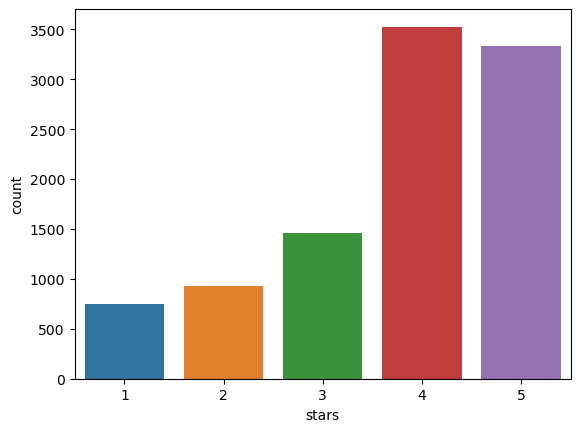

In [30]:
import seaborn as sns
#sns.countplot(x=df['stars'])
sns.countplot(x='stars',data=df)

In [33]:
yelplow = df[(df['stars'] == 1) | (df['stars'] == 5)]
print(yelplow)


                 business_id        date               review_id  stars  \
0     9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1     ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
3     _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4     6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   
6     zp713qNhx8d9KCJJnrw1xA  2010-02-12  riFQ3vxNpP4rWLk_CSri2A      5   
...                      ...         ...                     ...    ...   
9990  R8VwdLyvsp9iybNqRvm94g  2011-10-03  pcEeHdAJPoFNF23es0kKWg      5   
9991  WJ5mq4EiWYAA4Vif0xDfdg  2011-12-05  EuHX-39FR7tyyG1ElvN1Jw      5   
9992  f96lWMIAUhYIYy9gOktivQ  2009-03-10  YF17z7HWlMj6aezZc-pVEw      5   
9994  L3BSpFvxcNf3T_teitgt6A  2012-03-19  0nxb1gIGFgk3WbC5zwhKZg      5   
9999  pF7uRzygyZsltbmVpjIyvw  2010-10-16  vWSmOhg2ID1MNZHaWapGbA      5   

                                                   text    type  \
0     my wife took me here on my

In [35]:
yelplow.shape

(4086, 10)

In [39]:
yelplow.sample(100)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
1774,JokKtdXU7zXHcr20Lrk29A,2010-05-31,5cL5OWLIRg8WvtT5kAFy8A,5,in a sentance four peaks is definatly somethin...,review,vF4B6eFdoDmyV_l7MLHMzw,2,2,1
2436,Rga1ZkAyy-mFQmICQ2akVw,2011-08-27,SG71yfnn3XkQ_UrplbE6HQ,5,my daughters i bmw was horribly keyed this sum...,review,FBnMnm-1YbcJynWD4Wi28A,1,2,0
2186,xtX2qS64zP2NRPV_7NNqHw,2012-02-06,3H-jBJDs3BP2sKHk80vp_g,5,this review is for localsthe hyatt isnt just a...,review,4ozupHULqGyO42s3zNUzOQ,5,6,3
3470,BPi1Q5wX0_o5VlO_XRyYuQ,2012-07-26,mA1km9oCjlzujylkarUfGw,5,chef bianco does it again the homemade pasta i...,review,5RA1yMlY9ZpK3DXsW3nEMw,0,1,0
3115,qW9UysjJw3y3CwEbzruEEw,2012-05-05,YZmoiRFz5bTBX8PF3M_FZg,5,elmer i love youi have since i was a senior at...,review,LS4pZdJnAx71TTJao6lNMQ,1,1,1
...,...,...,...,...,...,...,...,...,...,...
3748,trAvQPp7gps0Btk-2AmLpw,2008-04-10,dXmgGJTDhC0AbCPNXfi7EQ,1,the food is simple pure and uncomplicated you ...,review,BrJcbK_lH0irQcNSNBEQHQ,3,3,7
1923,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,brought a friend from louisiana here she says...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0
3818,1621ir5mjVgbHwxCbMAEjg,2012-01-01,7JeaEtlIOunTbpkviFO3Hg,5,i love the other locations of thai rama and th...,review,O8w525BpmlvbocQRhavfmQ,0,0,0
1755,yYbd9P1KmlPSKmQxo68n_g,2012-06-23,jEOJX7yamUXjir-Sdr1fJA,5,ive been here three times and have had terrifi...,review,ewnwxqKtpDv8erOIZkCpjA,2,1,0


In [37]:
yelplow.reset_index(drop=True,inplace=True)

In [38]:
yelplow.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,my wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,i have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,rosie dakota and i love chaparral dog park its...,review,uZetl9T0NcROGOyFfughhg,1,2,0
3,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,general manager scott petello is a good egg no...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
4,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,drop what youre doing and drive here after i a...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [45]:
y=yelplow['stars']
X=yelplow['text']

In [46]:
vect=CountVectorizer()

In [47]:
X=vect.fit_transform(X)

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [67]:
tf=pd.DataFrame(X_train.toarray(),columns=vect.get_feature_names_out())

In [68]:
tf.head()

,______i,aa,aaa,aaaamazingthey,aaammmazzingits,aaron,aathis,ab,aback,abandoned,...,zuchinni,zumba,zupa,zupas,zuzu,zuzus,zwiebelkräuter,éclairs,école,ém
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
tf.shape

(3268, 24718)

### Building Model


In [70]:
lr=LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

C:\Users\flutt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [73]:
pred=lr.predict(X_test)

### Evalatuion

In [74]:
accuracy_score(y_test,pred)

0.9156479217603912

In [75]:
confusion_matrix(y_test,pred)

array([[114,  53],
       [ 16, 635]], dtype=int64)